# Tensorflow

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore', RuntimeWarning)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
import tensorflow as tf

In [6]:
import tensorflow_probability as tfp
tfd = tfp.distributions

## Working with tensors

Almost exactly like numpy arrays.

In [7]:
tf.constant([1., 2., 3.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [8]:
x = tf.Variable([[1.,2.,3.], [4.,5.,6.]])

In [9]:
x.shape

TensorShape([2, 3])

In [10]:
x.dtype

tf.float32

### Conversin to numpy

In [11]:
x.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

### Indexing

In [12]:
x[:, :2]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [4., 5.]], dtype=float32)>

### Assignment

In [13]:
x[0,:].assign([3.,2.,1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[3., 2., 1.],
       [4., 5., 6.]], dtype=float32)>

In [14]:
x

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[3., 2., 1.],
       [4., 5., 6.]], dtype=float32)>

### Reductions

In [15]:
tf.reduce_mean(x, axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([3.5, 3.5, 3.5], dtype=float32)>

In [16]:
tf.reduce_sum(x, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 6., 15.], dtype=float32)>

### Broadcasting

In [17]:
x + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[13., 12., 11.],
       [14., 15., 16.]], dtype=float32)>

In [18]:
x * 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[30., 20., 10.],
       [40., 50., 60.]], dtype=float32)>

In [19]:
x - tf.reduce_mean(x, axis=1)[:, tf.newaxis]

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  0., -1.],
       [-1.,  0.,  1.]], dtype=float32)>

### Matrix operations

In [20]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 28.],
       [28., 77.]], dtype=float32)>

### Ufuncs

In [21]:
tf.exp(x)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 20.085537 ,   7.389056 ,   2.7182817],
       [ 54.59815  , 148.41316  , 403.4288   ]], dtype=float32)>

In [22]:
tf.sqrt(x)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1.7320508, 1.4142135, 1.       ],
       [2.       , 2.236068 , 2.4494898]], dtype=float32)>

### Random numbers

In [23]:
X = tf.random.normal(shape=(10,4))
y = tf.random.normal(shape=(10,1))

### Linear algebra

In [24]:
tf.linalg.lstsq(X, y)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[ 0.02415883],
       [ 0.17781891],
       [-0.20745884],
       [-0.30115527]], dtype=float32)>

### Vectorization

In [25]:
X = tf.random.normal(shape=(1000,10,4))
y = tf.random.normal(shape=(1000,10,1))

In [26]:
tf.linalg.lstsq(X, y)

<tf.Tensor: shape=(1000, 4, 1), dtype=float32, numpy=
array([[[ 0.19148365],
        [-0.51689374],
        [-0.17029501],
        [ 0.484788  ]],

       [[ 0.7028206 ],
        [-0.15227778],
        [ 0.6967405 ],
        [-0.60269237]],

       [[-0.25489303],
        [ 0.20810236],
        [ 0.88173383],
        [ 0.28963062]],

       ...,

       [[-0.15725346],
        [ 0.49795693],
        [ 0.13796304],
        [-0.11143823]],

       [[-0.00428388],
        [ 0.6222656 ],
        [ 0.02911544],
        [-0.56122893]],

       [[ 0.3179135 ],
        [-0.41116422],
        [-0.16914578],
        [ 0.5184275 ]]], dtype=float32)>

### Automatic differntiation

In [27]:
def f(x,y):
    return x**2 + 2*y**2 + 3*x*y

#### Gradient

In [28]:
x, y = tf.Variable(1.0), tf.Variable(2.0)

In [29]:
with tf.GradientTape() as tape:
    z = f(x, y)

In [30]:
tape.gradient(z, [x,y])

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.0>]

#### Hessian

In [31]:
with tf.GradientTape(persistent=True) as H_tape:
    with tf.GradientTape() as J_tape:
        z = f(x, y)
    Js = J_tape.gradient(z, [x,y])
Hs = [H_tape.gradient(J, [x,y]) for J in Js]
del H_tape                    

In [32]:
np.array(Hs)

array([[2., 3.],
       [3., 4.]], dtype=float32)

## Tensorflow proability

### Distributions

In [33]:
[str(x).split('.')[-1][:-2] for x in tfd.distribution.Distribution.__subclasses__()]

['Autoregressive',
 'BatchReshape',
 'Bates',
 'Bernoulli',
 'Beta',
 'Gamma',
 'Binomial',
 'BetaBinomial',
 'JointDistribution',
 'JointDistribution',
 '_Cast',
 'Blockwise',
 'Categorical',
 'Cauchy',
 'Chi2',
 'TransformedDistribution',
 'LKJ',
 'CholeskyLKJ',
 'ContinuousBernoulli',
 '_BaseDeterministic',
 '_BaseDeterministic',
 'Dirichlet',
 'Multinomial',
 'DirichletMultinomial',
 'DoublesidedMaxwell',
 'Empirical',
 'FiniteDiscrete',
 'GammaGamma',
 'Normal',
 'Sample',
 'GaussianProcess',
 'GeneralizedNormal',
 'GeneralizedPareto',
 'Geometric',
 'Uniform',
 'HalfCauchy',
 'HalfNormal',
 'StudentT',
 'HalfStudentT',
 'HiddenMarkovModel',
 'Horseshoe',
 'Independent',
 'InverseGamma',
 'InverseGaussian',
 'Laplace',
 'LinearGaussianStateSpaceModel',
 'Logistic',
 'Mixture',
 'MixtureSameFamily',
 'MultivariateStudentTLinearOperator',
 'NegativeBinomial',
 'OneHotCategorical',
 'OrderedLogistic',
 'Pareto',
 'PERT',
 'QuantizedDistribution',
 'Poisson',
 '_TensorCoercible',
 'Pi

In [34]:
dist = tfd.Normal(loc=100, scale=15)

In [35]:
x = dist.sample((3,4))
x

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 90.82311 , 115.852325,  69.85233 , 111.310234],
       [114.064575, 113.6998  , 104.08606 , 115.32353 ],
       [ 98.11167 , 104.219315, 112.88289 , 106.38903 ]], dtype=float32)>

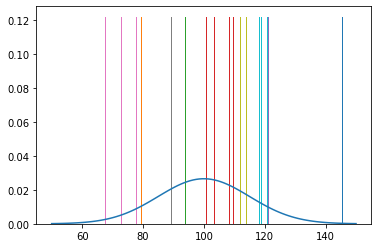

In [36]:
n = 100
xs = dist.sample(n)
plt.hist(xs, density=True)
xp = tf.linspace(50., 150., 100)
plt.plot(xp, dist.prob(xp))
pass

### Broadcasting

In [37]:
dist = tfd.Normal(loc=[3,4,5,6], scale=0.5)

In [38]:
dist.sample(5)

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[3.4214985, 4.020046 , 5.4378996, 7.129439 ],
       [2.4713418, 3.6216328, 5.1785645, 6.5690327],
       [3.2009451, 3.6195786, 5.032829 , 5.546834 ],
       [2.6353314, 3.8272653, 4.5734615, 6.2040973],
       [3.0592232, 4.0541725, 4.9947314, 5.419991 ]], dtype=float32)>

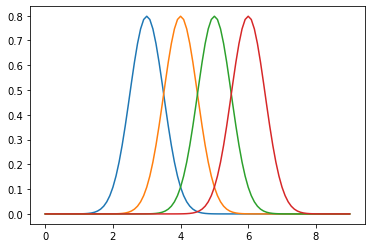

In [39]:
xp = tf.linspace(0., 9., 100)[:, tf.newaxis]
plt.plot(np.tile(xp, dist.batch_shape), dist.prob(xp))
pass

### Mixtures

In [40]:
gmm = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(
        probs=[0.4, 0.1, 0.2, 0.3]
    ),
    components_distribution=tfd.Normal(
      loc=[3., 4., 5., 6.],      
      scale=[0.1, 0.5, 0.5, .1])
)

In [41]:
n = 10000
xs = gmm.sample(n)

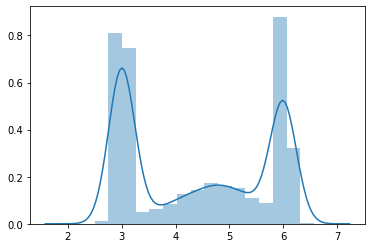

In [42]:
sns.distplot(xs)
pass

### Transformations

In [43]:
[x for x in dir(tfp.bijectors) if x[0].isupper()]

['AbsoluteValue',
 'Affine',
 'AffineLinearOperator',
 'AffineScalar',
 'AutoregressiveNetwork',
 'BatchNormalization',
 'Bijector',
 'Blockwise',
 'Chain',
 'CholeskyOuterProduct',
 'CholeskyToInvCholesky',
 'CorrelationCholesky',
 'Cumsum',
 'DiscreteCosineTransform',
 'Exp',
 'Expm1',
 'FFJORD',
 'FillScaleTriL',
 'FillTriangular',
 'FrechetCDF',
 'GeneralizedExtremeValueCDF',
 'GeneralizedPareto',
 'GompertzCDF',
 'GumbelCDF',
 'Identity',
 'Inline',
 'Invert',
 'IteratedSigmoidCentered',
 'KumaraswamyCDF',
 'LambertWTail',
 'Log',
 'Log1p',
 'MaskedAutoregressiveFlow',
 'MatrixInverseTriL',
 'MatvecLU',
 'MoyalCDF',
 'NormalCDF',
 'Ordered',
 'Pad',
 'Permute',
 'PowerTransform',
 'RationalQuadraticSpline',
 'RealNVP',
 'Reciprocal',
 'Reshape',
 'Scale',
 'ScaleMatvecDiag',
 'ScaleMatvecLU',
 'ScaleMatvecLinearOperator',
 'ScaleMatvecTriL',
 'ScaleTriL',
 'Shift',
 'ShiftedGompertzCDF',
 'Sigmoid',
 'Sinh',
 'SinhArcsinh',
 'SoftClip',
 'Softfloor',
 'SoftmaxCentered',
 'Softplus

In [44]:
lognormal = tfp.bijectors.Exp()(tfd.Normal(0, 0.5))

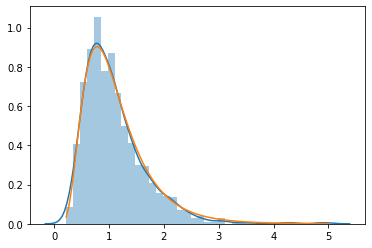

In [45]:
xs = lognormal.sample(1000)
sns.distplot(xs)
xp = np.linspace(tf.reduce_min(xs), tf.reduce_max(xs), 100)
plt.plot(xp, tfd.LogNormal(loc=0, scale=0.5).prob(xp))
pass

## Regression

In [46]:
xs = tf.Variable([0., 1., 2., 5., 6., 8.])
ys = tf.sin(xs) + tfd.Normal(loc=0, scale=0.5).sample(xs.shape[0])

In [47]:
xs.shape, ys.shape

(TensorShape([6]), TensorShape([6]))

In [48]:
xs.numpy()

array([0., 1., 2., 5., 6., 8.], dtype=float32)

In [49]:
ys.numpy()

array([-0.21832775,  0.49554497,  1.124055  , -0.30666602, -0.6614609 ,
        1.8780737 ], dtype=float32)

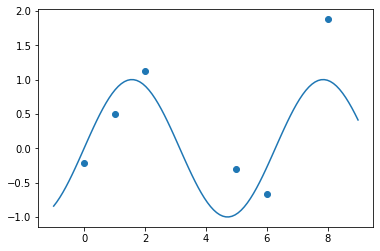

In [50]:
xp = tf.linspace(-1., 9., 100)[:, None]
plt.scatter(xs.numpy(), ys.numpy())
plt.plot(xp, tf.sin(xp))
pass

In [51]:
kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(length_scale=1.5)
reg = tfd.GaussianProcessRegressionModel(
    kernel, xp[:, tf.newaxis], xs[:, tf.newaxis], ys
)

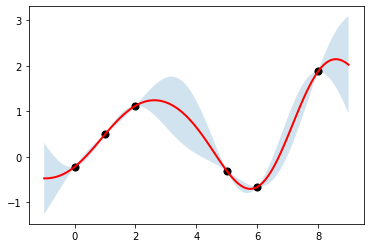

In [52]:
ub, lb = reg.mean() + [2*reg.stddev(), -2*reg.stddev()]
plt.fill_between(np.ravel(xp), np.ravel(ub), np.ravel(lb), alpha=0.2)
plt.plot(xp, reg.mean(), c='red', linewidth=2)
plt.scatter(xs[:], ys[:], s=50, c='k')
pass

## Tenssorflow Data

Tesnorflow provides a data API to allow it to work seamlessly with large data sets that may not fit into memory. This results in`Tesnorfolw Dataset (TFDS)` objects that handle multi-threading, queuing, batching and pre-fetching. 

You can think of TFDS as being a smart generator from data. Generally, you first create a TFDS from data using `from_tensor_slices` or from data in the file system or a relational database. Then you apply `trasnforms` to the data to process it, before handing it off to, say, a deep learning method.

### Using `from_tensor_slices`

You can pass in a list, dict, `numpy` array, or Tensorflow tensor.

In [53]:
x = np.arange(6)
ds = tf.data.Dataset.from_tensor_slices(x)
ds

<TensorSliceDataset shapes: (), types: tf.int64>

In [54]:
for item in ds.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


### Transformations

Once you have a TFDS, you can chain its transformation methods to process the data. We will cover functional programming next week, but most of this should be comprehensible even without a deep understanding of functional programming.

In [55]:
ds = ds.map(lambda x: x**2).repeat(3)

In [56]:
for item in ds.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


In [57]:
ds = ds.shuffle(buffer_size=4, seed=0).batch(5)

In [58]:
for item in ds.take(3):
    print(item)

tf.Tensor([ 0  9  4  0 25], shape=(5,), dtype=int64)
tf.Tensor([ 1  9  1 16  0], shape=(5,), dtype=int64)
tf.Tensor([16  4  1 16  4], shape=(5,), dtype=int64)


#### Prefetching is an optimization to preload data in parallel

In [59]:
ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

<PrefetchDataset shapes: (None,), types: tf.int64>

### Reading from files

You can also read from CSV, text files or SQLite database and transform in the same way.

In [60]:
ds = tf.data.experimental.CsvDataset(
    'data/X_train_unscaled.csv',
    record_defaults=[tf.float32]*10,
    header=True
)

In [61]:
for item in ds.take(1):
    print(item)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>, <tf.Tensor: shape=(), dtype=float32, numpy=1.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=52.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=30.5>, <tf.Tensor: shape=(), dtype=float32, numpy=1.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>)
